# **Machine Learning Classification Model -- Morphological Classification of Galaxies using Decision Trees**

**Mount the Google Drive where the .npy file was saved, which is the galaxy data from the Sloan Digital Sky Survey (SDSS), and loading the data using numpy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive

In [ ]:
file_path = "/content/drive/My Drive/157CDATASET/"

In [ ]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Checking out the couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [ ]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

**Here, we get the features and targets of the data**

We write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In this case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.



In [ ]:
import pandas as pd

data = pd.DataFrame(data)

def get_features_targets(dataset):
  data['petroR50/R90_r'] = data['petroR50_r'] / data['petroR90_r']
  data['petroR50/R90_u'] = data['petroR50_u'] / data['petroR90_u']
  data['petroR50/R90_z'] = data['petroR50_z'] / data['petroR90_z']

  features = data[['u-g', 'g-r', 'r-i', 'i-z', 'ecc', 'm4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z', 'petroR50/R90_r', 'petroR50/R90_u', 'petroR50/R90_z']].to_numpy()
  targets = data['class'].to_numpy()

  return features, targets

features, targets = get_features_targets(data)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


We write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. Here the concentrations are manually coded. And the elements of the ```features``` are hard coded as well, though I'm pretty sure there is a much more efficient way. But the function works, so we push through.

**Now, we train and run a decision tree model**

A function ```predict_class``` is written that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def predict_class(data):
  features, targets = get_features_targets(data)
  feat_train, feat_test, targ_train, targ_test = train_test_split(features, targets, train_size=0.8, test_size=0.2, random_state = 23)

  DTC = DecisionTreeClassifier()
  DTC = DTC.fit(feat_train, targ_train)

  predicted = DTC.predict(feat_test)
  actual = targ_test
  return predicted, actual

predicted_class, actual_class = predict_class(data)
for i in np.arange(11):
  print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))

0, spiral, merger
1, merger, spiral
2, merger, merger
3, merger, merger
4, elliptical, elliptical
5, spiral, spiral
6, merger, merger
7, merger, spiral
8, spiral, spiral
9, elliptical, elliptical
10, merger, merger


We have written a function ```predict_class``` that trains and validates a model that predicts a galaxy's class from its photometric properties. Here we can see the predicted and actual class of the 11 test galaxies. In this particular run, only 2/11 had the wrong prediction, while the rest are correctly predicted.

**Making a confusion matrix and testing the accuracy**

The confusion matrix for the test dataset is a 3 x 3 matrix with the counts for each combination of actual and predicted class. The test accuracy of the decision tree classifer is defined as the number of correct predictions divided by the total number of predictions.

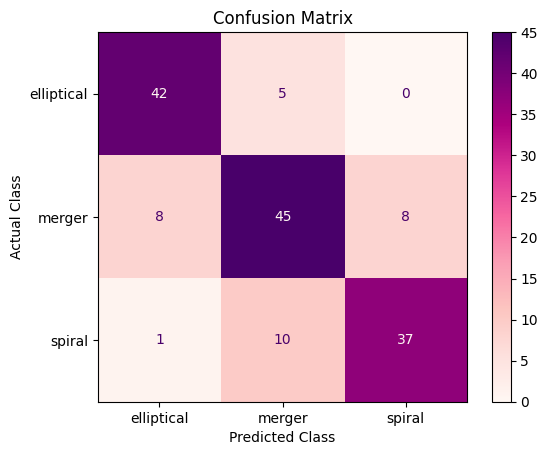

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM = confusion_matrix(actual_class, predicted_class)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels = ['elliptical', 'merger', 'spiral'])
disp.plot(cmap='RdPu')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

 The confusion matrix above shows the counts for each combination of the actual and predicted class. In total (in this run), the wrongly predicted sums up to 32, the correctly predicted ones are of 124. In this run, we can see the merger-merger (predicted-actual) has the most counts out of all the combinations.

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(predicted_class, actual_class)

correct = np.sum(actual_class == predicted_class)
total = len(predicted_class)

manual_accuracy = correct / total

print(sklearn_accuracy)
print(manual_accuracy)

0.7948717948717948
0.7948717948717948


In this run, we get an accuracy of 79.49%. Both the function from sklearn and the manual computation show the same number to a T (not surprising, since it's as easy as the number of correct predictions divided by the total number of predictions).